In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Mounted at /content/drive


In [3]:
#Reading the Datasets
df = pd.read_excel("/content/drive/MyDrive/matches.xlsx")

df2 = pd.read_excel("/content/drive/MyDrive/deliveries.xlsx")

In [4]:
#Cleaning the dataset
sub_df = df.drop(['umpire1','umpire2','umpire3'],axis = 'columns')

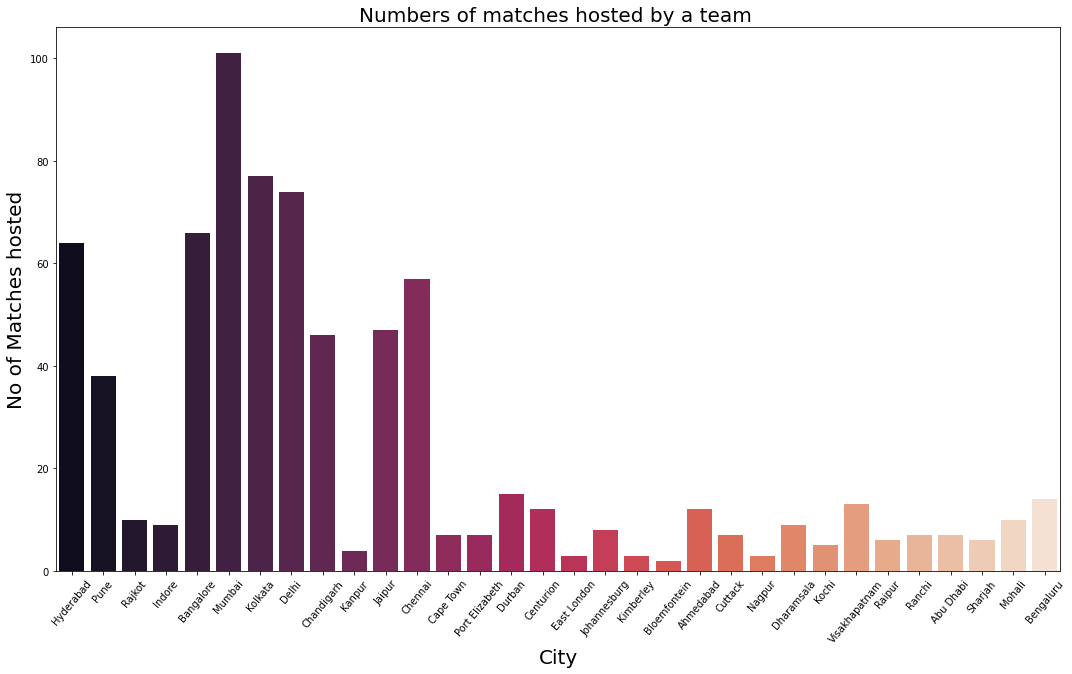

In [5]:
#Cities that have hosted ipl
plt.figure(figsize = (18,10))
sns.countplot(x='city',data=sub_df, palette='rocket')
plt.title("Numbers of matches hosted by a team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("City",fontsize=20)
plt.ylabel("No of Matches hosted",fontsize=20)
plt.show()


<BarContainer object of 12 artists>

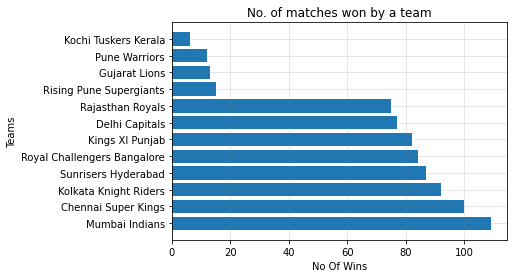

In [6]:
#Most Succesful Team

sub_df.replace(["Rising Pune Supergiant","Deccan Chargers","Delhi Daredevils"],
               ["Rising Pune Supergiants","Sunrisers Hyderabad","Delhi Capitals"],inplace = True)


mod_df = sub_df[['id','season','winner']]
merged = df2.merge(mod_df,left_on = 'match_id',right_on = "id")
merged.replace(["Rising Pune Supergiant","Deccan Chargers","Delhi Daredevils"],
               ["Rising Pune Supergiants","Sunrisers Hyderabad","Delhi Capitals"],inplace = True)



MST = sub_df["winner"].value_counts()

plt.ylabel("Teams")
plt.xlabel("No Of Wins")
plt.title("No. of matches won by a team")
plt.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.9,
        alpha = 0.2)
plt.barh(MST.index , MST,label = 'No.of Matches won')

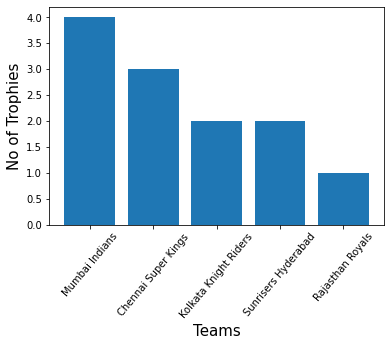

In [7]:
#Most Succesful Team - Part II
final_matches=sub_df.drop_duplicates(subset=['season'], keep='last',ignore_index=True)

Title_winner = final_matches[['season','winner']].sort_values('season')
No_of_titles = Title_winner['winner'].value_counts()
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of Trophies",fontsize=15)

plt.bar(No_of_titles.index,No_of_titles)
plt.show()

In [8]:
#Highest Number Of Wins per Season
wins_per_season = sub_df.groupby("season")["winner"].value_counts()
print(wins_per_season)
wins_per_toss = sub_df.groupby("toss_winner")["toss_decision"].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64


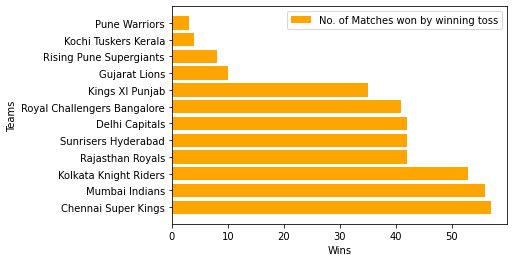

In [9]:
#Winning Both the toss & match per team

lista = []
(sub_df["toss_winner"].value_counts())
ss =sub_df['toss_winner'] == sub_df['winner']
le = (len(df['toss_winner']))
for i in range(0,le):
    g = sub_df.at[i,'toss_winner']
    h = sub_df.at[i,'winner']
    if g==h :
        lista.append(g)
        
h = pd.Series(lista)  

Toss_wins = h.value_counts()
plt.ylabel("Teams")
plt.xlabel("Wins")
plt.barh(Toss_wins.index,Toss_wins,label = 'No. of Matches won by winning toss',color = 'orange')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


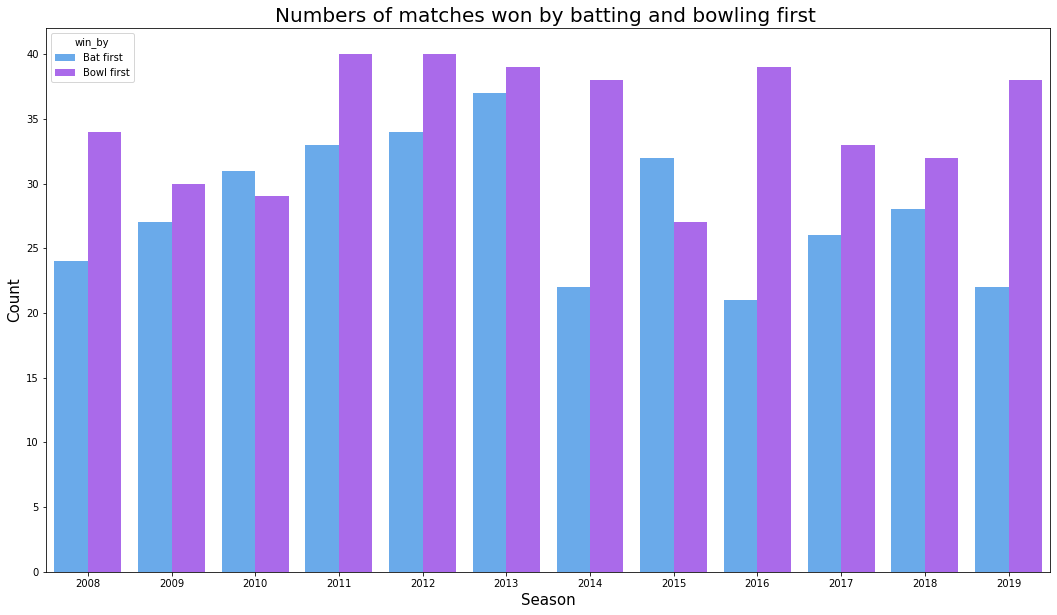

In [10]:
#Bowling or Batting First wins?
sub_df['win_by']=np.where(sub_df['win_by_runs']>0,'Bat first','Bowl first')

plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=sub_df,palette='cool')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if __name__ == '__main__':


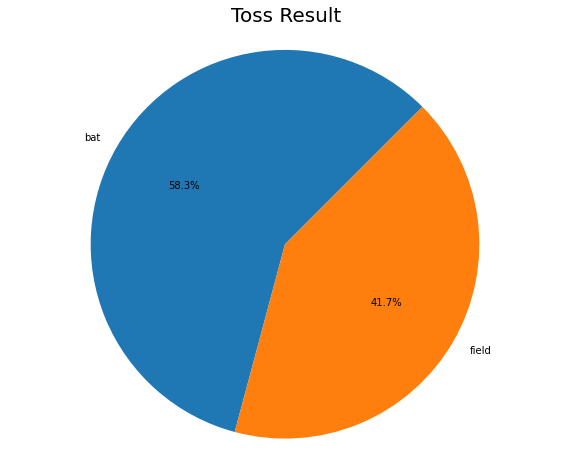

In [11]:
#Toss decision in final
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%',startangle = 45)
plt.title('Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


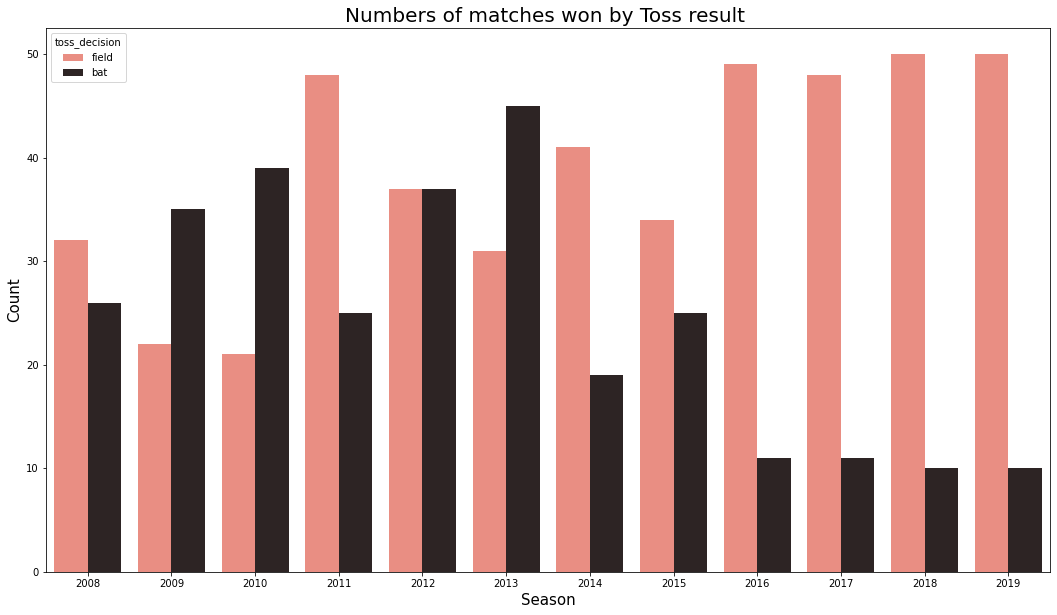

In [12]:
#Winning by toss results each season
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=sub_df,palette='dark:salmon_r')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

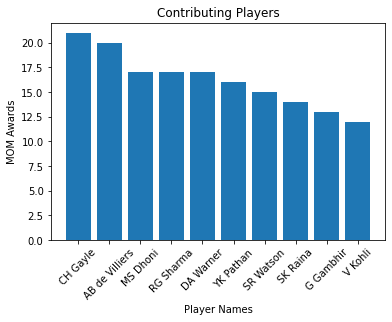

In [13]:
#Most Contributing Player each match
gty =sub_df["player_of_match"].value_counts()[:10]
plt.xticks(rotation=45)
plt.xlabel("Player Names")
plt.ylabel("MOM Awards")
plt.title("Contributing Players")
plt.bar(gty.index,gty)
plt.show()

In [14]:
#Contributing player in final
Title_winner = final_matches[['season','winner','player_of_match']].sort_values('season')
print(Title_winner)


    season                 winner player_of_match
1     2008       Rajasthan Royals       YK Pathan
2     2009    Sunrisers Hyderabad        A Kumble
3     2010    Chennai Super Kings        SK Raina
4     2011    Chennai Super Kings         M Vijay
5     2012  Kolkata Knight Riders        MS Bisla
6     2013         Mumbai Indians      KA Pollard
7     2014  Kolkata Knight Riders       MK Pandey
8     2015         Mumbai Indians       RG Sharma
9     2016    Sunrisers Hyderabad     BCJ Cutting
0     2017         Mumbai Indians       KH Pandya
10    2018    Chennai Super Kings       SR Watson
11    2019         Mumbai Indians       JJ Bumrah


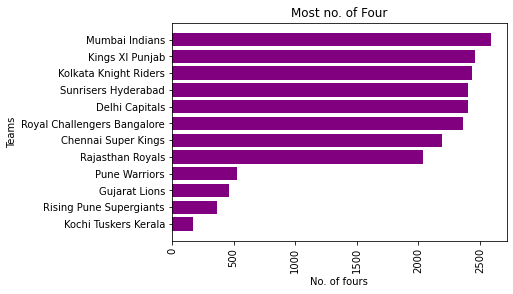

In [28]:
#Team with Highest number of fours
four_data=merged[merged['batsman_runs']==4]
F_graph = four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')]).sort_values("runs by fours")
plt.xticks(rotation = 90)
plt.xlabel("No. of fours")
plt.ylabel("Teams")
plt.title("Most no. of Four")
plt.barh(F_graph.index,F_graph['fours'],color = 'purple')
plt.show()

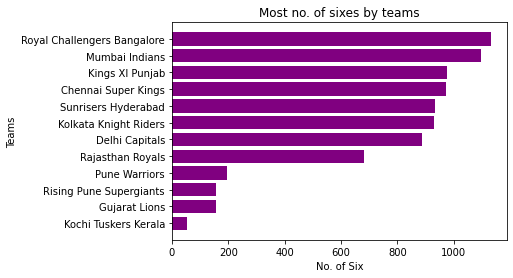

In [29]:
#Team with Highest number of sixes
Team_Six=merged[merged['batsman_runs']==6]
TS_graph = Team_Six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('six','count')]).sort_values("runs by six")
plt.xticks(rotation = 0)
plt.xlabel("No. of Six")
plt.ylabel("Teams")
plt.title("Most no. of sixes by teams")
plt.barh(TS_graph.index,TS_graph['six'],color = 'purple')
plt.show()

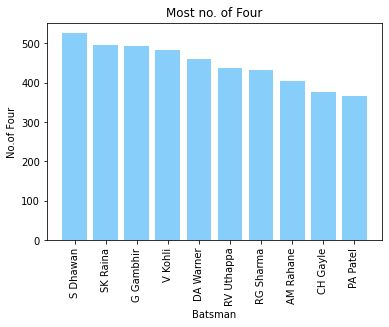

In [17]:
#Player with Highest number of fours
Playerfour_data=merged[merged['batsman_runs']==4]
PF_graph = Playerfour_data.groupby('batsman')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')]).sort_values("runs by fours",ascending = False).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Batsman")
plt.ylabel("No.of Four")
plt.title("Most no. of Four")
plt.bar(PF_graph.index,PF_graph['fours'],color = 'lightskyblue')
plt.show()

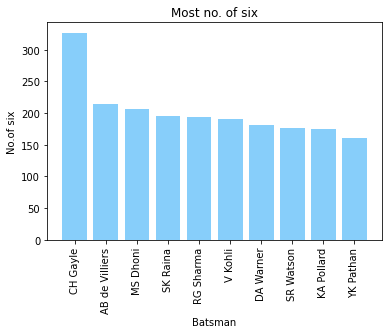

In [18]:
#Player with Highest number of sixes
PlayerSix_data=merged[merged['batsman_runs']==6]
PS_graph= PlayerSix_data.groupby('batsman')['batsman_runs'].agg([('runs by six','sum'),('six','count')]).sort_values("runs by six",ascending = False).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Batsman")
plt.ylabel("No.of six")
plt.title("Most no. of six")
plt.bar(PS_graph.index,PS_graph['six'],color = 'lightskyblue')
plt.show()

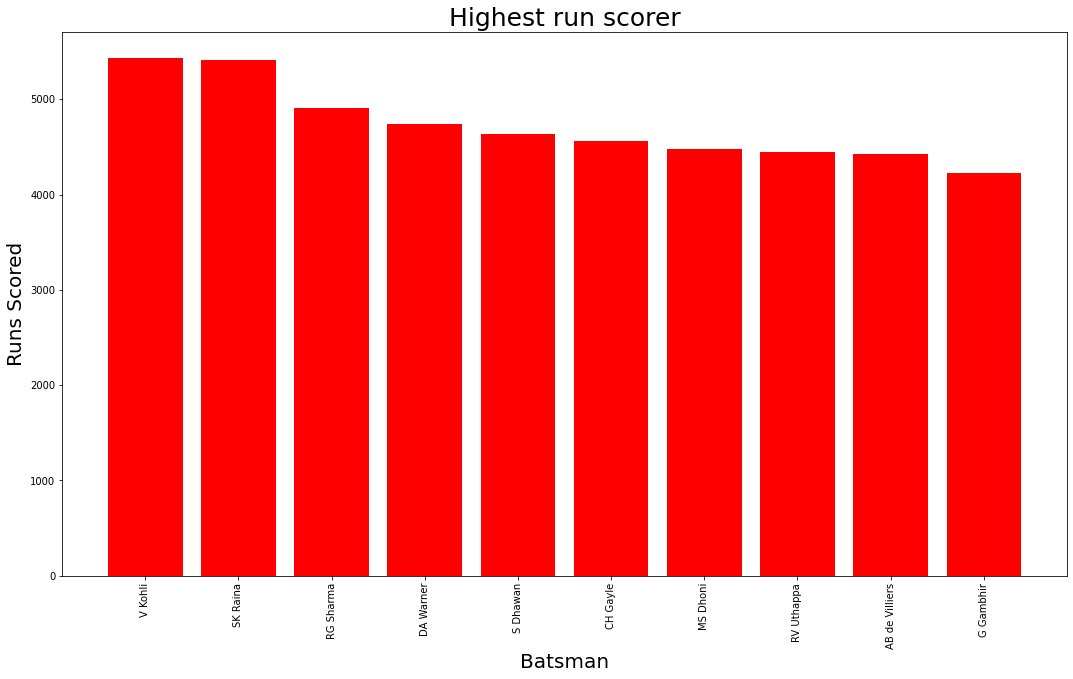

In [19]:
#Highest Run scorer overall
Runs_Overall = merged.groupby("batsman")['batsman_runs'].agg([('total runs','sum')])
R_O_graph = Runs_Overall.sort_values("total runs",ascending = False).head(10)
plt.figure(figsize = (18,10))
plt.xticks(rotation = 90)
plt.xlabel("Batsman",fontsize =20)
plt.ylabel("Runs Scored",fontsize =20)
plt.title("Highest run scorer",fontsize =25)
plt.bar(R_O_graph.index,R_O_graph['total runs'],color = 'Red')
plt.show()

Enter the year for knowing the highest run scorer of that year2016


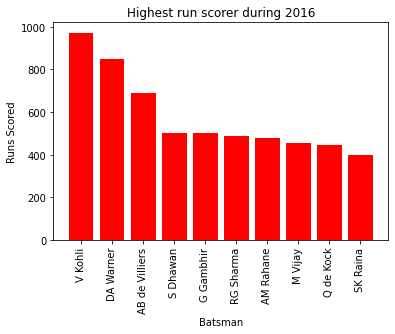

In [20]:
#Highest Run scorer each season
n = int(input("Enter the year for knowing the highest run scorer of that year"))
High_runs=merged[merged['season'] == n]
HR_graph = High_runs.groupby('batsman')['batsman_runs'].agg([('total runs','sum')]).sort_values("total runs",ascending=False).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Batsman")
plt.ylabel("Runs Scored")
plt.title("Highest run scorer during {}".format(n))
plt.bar(HR_graph.index,HR_graph['total runs'],color = 'Red')
plt.show()

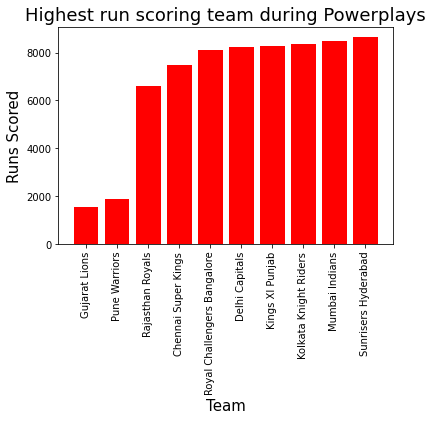

In [21]:
#Highest run scoring team during powerplays
PR=merged[merged['over'] < 7]
PRF = PR.groupby('batting_team')['total_runs'].agg([('total runs','sum')])
PR_Graph = PRF.sort_values("total runs").tail(10)
plt.xticks(rotation = 90)
plt.xlabel("Team",fontsize = 15)
plt.ylabel("Runs Scored",fontsize = 15)
plt.title("Highest run scoring team during Powerplays",fontsize = 18)
plt.bar(PR_Graph.index,PR_Graph['total runs'],color = 'Red')
plt.show()


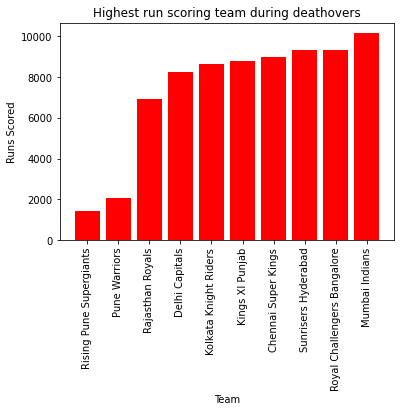

In [22]:
#Highest run scoring team during deathovers
DO_Run=merged[merged['over'] > 14]
DOR= DO_Run.groupby('batting_team')['total_runs'].agg([('total runs','sum')])
DOR_Graph = DOR.sort_values("total runs").tail(10)
plt.xticks(rotation = 90)
plt.xlabel("Team")
plt.ylabel("Runs Scored")
plt.title("Highest run scoring team during deathovers")
plt.bar(DOR_Graph.index,DOR_Graph['total runs'],color = 'Red')
plt.show()

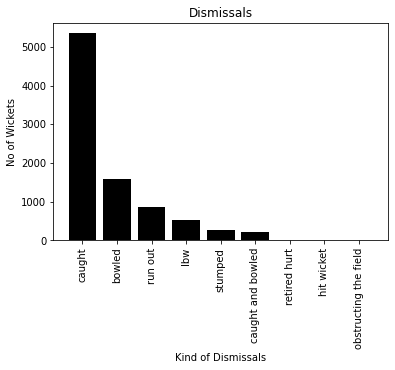

In [23]:
##Kind of Dissmisals
Field_Stats = merged['dismissal_kind'].value_counts()
plt.xticks(rotation = 90)
plt.xlabel("Kind of Dismissals")
plt.ylabel("No of Wickets")
plt.title("Dismissals")
plt.bar(Field_Stats.index , Field_Stats,color = 'Black')
plt.show()

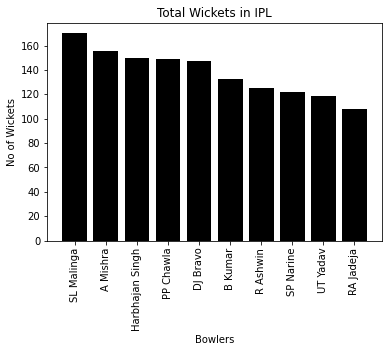

In [24]:
#Most Wickets ever in IPL
wicket_data=merged.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
h = wicket_data.groupby('bowler')['dismissal_kind'].agg([('wickets','count')]).reset_index().sort_values('wickets',ascending=False).reset_index(drop=True).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Bowlers")
plt.ylabel("No of Wickets")
plt.title("Total Wickets in IPL")
plt.bar(h['bowler'],h['wickets'],color = 'Black')
plt.show()

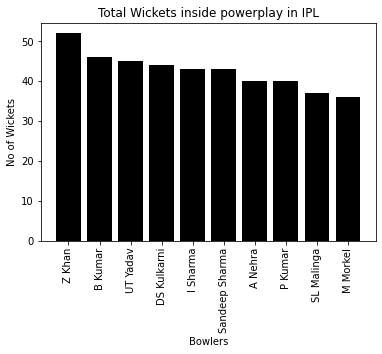

In [25]:
#Most wickets inside powerplay in IPL
wicket_data=merged.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data = wicket_data[wicket_data['over']< 7]
ph = wicket_data.groupby('bowler')['dismissal_kind'].agg([('wickets','count')]).reset_index().sort_values('wickets',ascending=False).reset_index(drop=True).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Bowlers")
plt.ylabel("No of Wickets")
plt.title("Total Wickets inside powerplay in IPL")
plt.bar(ph['bowler'],ph['wickets'],color = 'Black')
plt.show()

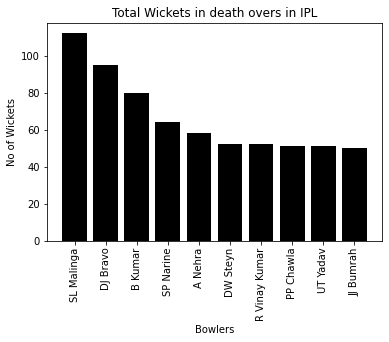

In [26]:
#Most wickets in death overs in IPL
wicket_data=merged.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data = wicket_data[wicket_data['over']>14]
hd = wicket_data.groupby('bowler')['dismissal_kind'].agg([('wickets','count')]).reset_index().sort_values('wickets',ascending=False).reset_index(drop=True).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Bowlers")
plt.ylabel("No of Wickets")
plt.title("Total Wickets in death overs in IPL")
plt.bar(hd['bowler'],hd['wickets'],color = 'Black')
plt.show()

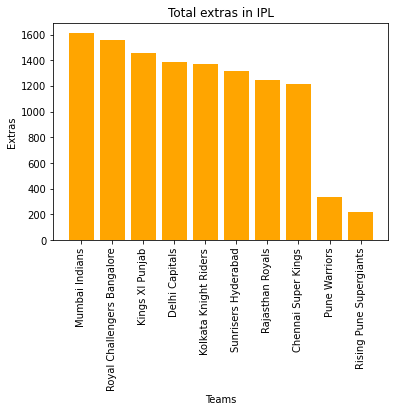

In [27]:
#Extras
Extr = merged.groupby('bowling_team')['extra_runs'].agg([('extras','sum')]).reset_index().sort_values('extras',ascending=False).reset_index(drop=True).head(10)
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Extras")
plt.title("Total extras in IPL")
plt.bar(Extr['bowling_team'],Extr['extras'],color = 'Orange')
plt.show()

From the dataset given we conclude the following :

•	Mumbai has hosted the maximum number of IPL matches.

•	By winning most number of titles and matches, Mumbai Indians are the most successful team in the history of IPL.

•	Chennai super kings has a better result in winning both the toss and match in the same game.

•	Over the years of IPL, most of the teams that have bowled first have emerged victoriously than teams that have batted first.

•	Over the years of IPL, most of the teams have chosen to bat first.

•	For the period 2016-2019, teams that have won the toss and had elected to field first have won a numerous amount of times.

•	Chris Gayle and AB De Villiers have been the most contributing players in the history of IPL.

•	Mumbai Indians has the most number of fours in the history of IPL.

•	Royal Challengers Bangalore has the most number of sixes in the history of IPL.

•	Shikhar Dhawan has the most number of fours in the history of IPL.

•	Chris Gayle has the most number of sixes in the history of IPL.

•	Virat Kohli has scored the most number of runs in the history of IPL.

•	Virat Kohli has the record of most number of runs scored in a season.

•	Sunrises Hyderabad has scored the most number of runs during the powerplays in the history of IPL.

•	Mumbai Indians has scored the most number of runs during the death-overs in the history of IPL.

•	Catch kind of dismissals have been the most in the history of IPL.

•	Lasith Malinga has bagged the most number of wickets in the history of IPL.

•	Zaheer Khan has the most number of wickets during the powerplay in the history of IPL.

•	Lasith Malinga has bagged the most number of wickets during the death overs in the history of IPL.

•	Mumbai Indians have conceded lots of extras in the history of IPL.
